In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Load Data

Loading the entire dataset before any filtering to conduct Exploratory Data Analysis

In [16]:
df_reviews = pd.read_csv('/content/drive/MyDrive/BT4222 Data/merged_reviews.csv')

In [4]:
print(df_reviews.columns.tolist())

['marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 'product_category', 'star_rating', 'helpful_votes', 'total_votes', 'vine', 'verified_purchase', 'review_headline', 'review_body', 'review_date']


In [13]:
print(df_reviews)

        marketplace  customer_id       review_id  product_id  product_parent  \
0                US     24509695  R3VR960AHLFKDV  B004HB5E0E       488241329   
1                US     34731776  R16LGVMFKIUT0G  B0042TNMMS       205864445   
2                US      1272331  R1AIMEEPYHMOE4  B0030MPBZ4       124663823   
3                US     45284262  R1892CCSZWZ9SR  B005G02ESA       382367578   
4                US     30003523  R285P679YWVKD1  B005JS8AUA       309497463   
...             ...          ...             ...         ...             ...   
4065450          US     52536938  R1NUYN39WEVD9X  B000050FDR       560045260   
4065451          US     47435897   RD17SQQ58L34O  B000050FDP       984726393   
4065452          US     48581323  R30DX2RCMIKQ90  B000050FDN       920405412   
4065453          US     51085800  R1O8C9XEYHQUIH  B000050G03        75674295   
4065454          US     48865192  R1WM4Y8G4DPHTL  B000050B62       757492866   

                                       

# Summary Statistics of Numerical Columns

In [14]:
df_reviews.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,4.065455e+06,4.065455e+06,4.065455e+06,4.065455e+06,4.065455e+06
mean,2.855681e+07,5.097583e+08,4.036019e+00,2.056495e+00,2.555476e+00
std,1.538382e+07,2.875844e+08,1.379634e+00,2.085614e+01,2.204300e+01
min,1.000500e+04,3.573000e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.493052e+07,2.607140e+08,3.000000e+00,0.000000e+00,0.000000e+00
50%,2.767645e+07,5.085523e+08,5.000000e+00,0.000000e+00,0.000000e+00
75%,4.299996e+07,7.624107e+08,5.000000e+00,1.000000e+00,1.000000e+00
max,5.309658e+07,9.999987e+08,5.000000e+00,1.278600e+04,1.294400e+04


In [15]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065455 entries, 0 to 4065454
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 465.3+ MB


In [16]:
df_reviews.shape

(4065455, 15)

In [17]:
# null values for each column
df_reviews.isnull().sum()

,0
marketplace,0
customer_id,0
review_id,0
product_id,0
product_parent,0
product_title,39
product_category,0
star_rating,0
helpful_votes,0
total_votes,0


In [9]:
df_no_review_header_body = df_reviews[df_reviews['review_headline'].isna() & df_reviews['review_body'].isna()]
num_no_review_header_body = df_no_review_header_body.shape[0]

print(f"Number of reviews with no review_headline and no review_body: {num_no_review_header_body}")

Number of reviews with no review_headline and no review_body: 1


In [18]:
# unique values for each column
df_reviews.apply(lambda col: col.nunique() if col.apply(lambda x: isinstance(x, (str, int, float, bool, type(None)))).all() else 'unhashable')

,0
marketplace,1
customer_id,2793205
review_id,4065455
product_id,356142
product_parent,305640
product_title,308467
product_category,4
star_rating,5
helpful_votes,974
total_votes,1010


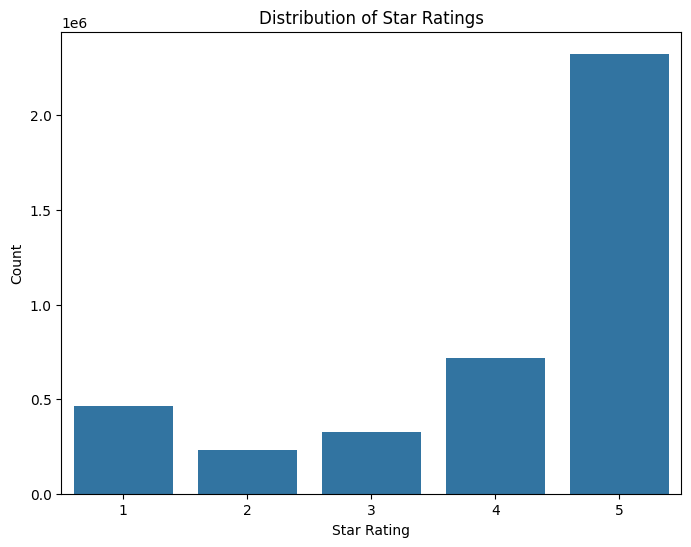

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='star_rating', data=df_reviews)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

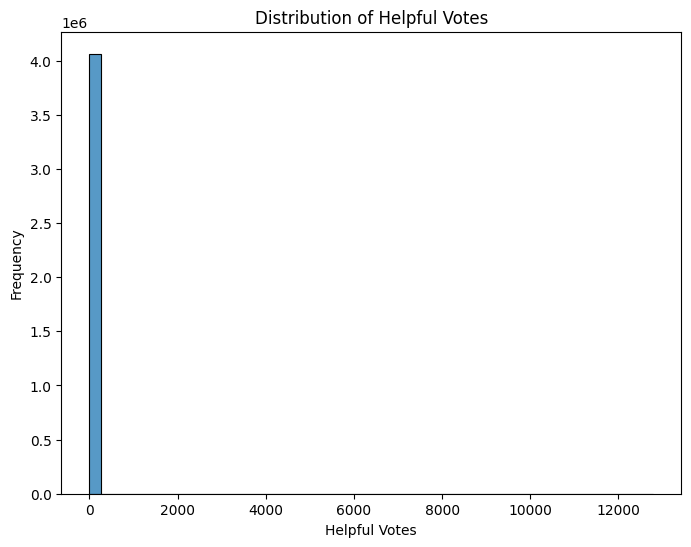

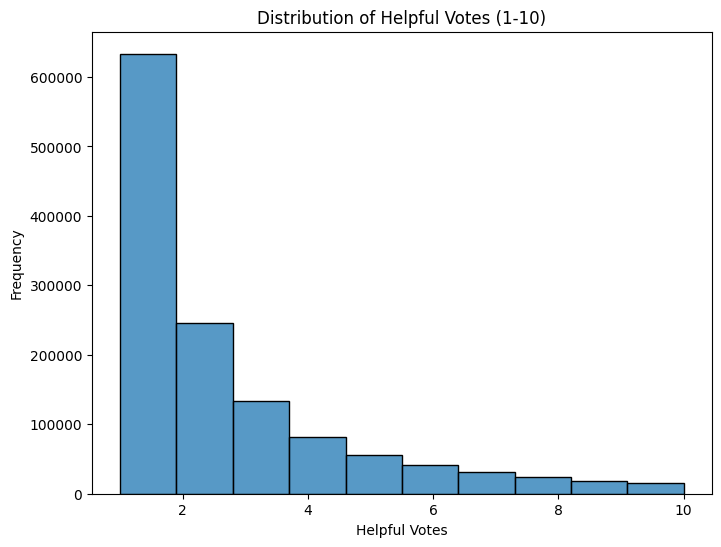

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(df_reviews['helpful_votes'], bins=50)
plt.title('Distribution of Helpful Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency')
plt.show()

# Filter helpful votes to include only values between 1 and 10
filtered_helpful_votes = df_reviews[(df_reviews['helpful_votes'] >= 1) & (df_reviews['helpful_votes'] <= 10)]
plt.figure(figsize=(8, 6))
sns.histplot(filtered_helpful_votes['helpful_votes'], bins=10)
plt.title('Distribution of Helpful Votes (1-10)')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency')
plt.show()

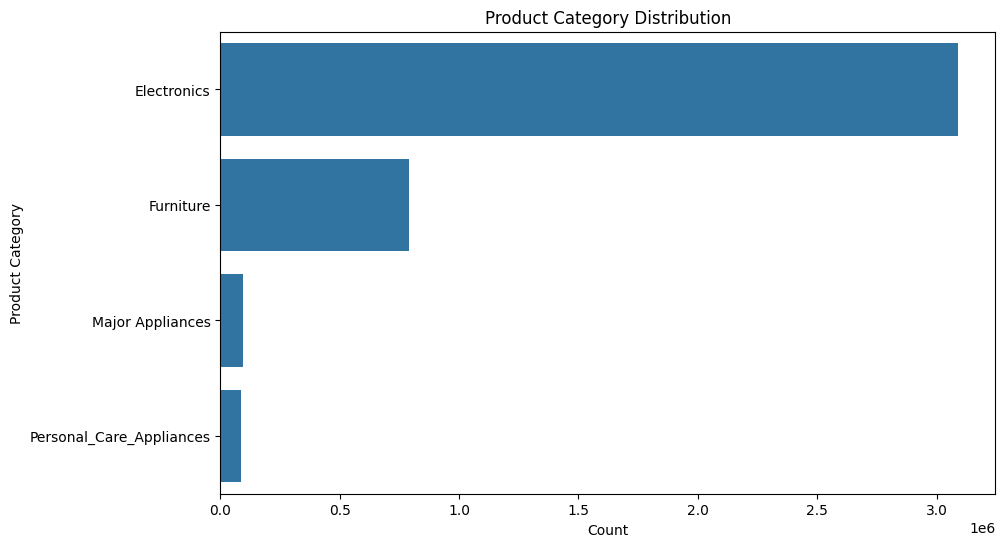

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(y='product_category', data=df_reviews, order=df_reviews['product_category'].value_counts().index)
plt.title('Product Category Distribution')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

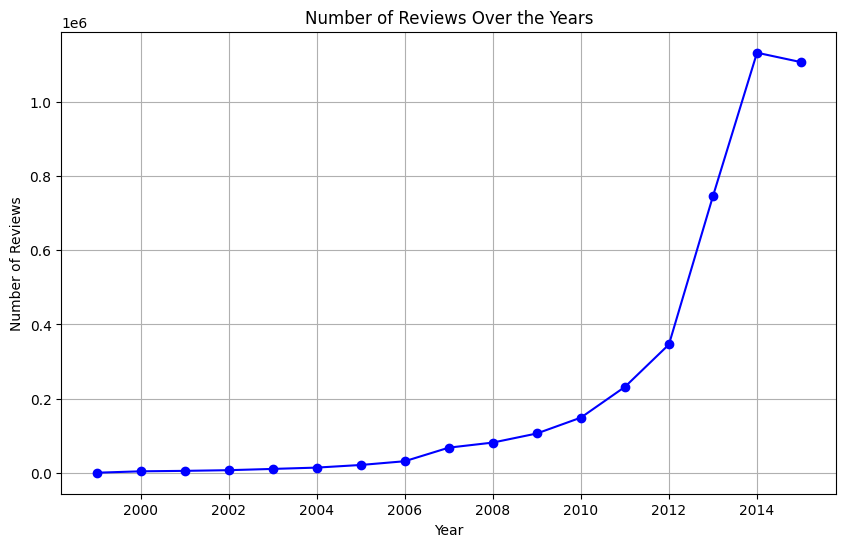

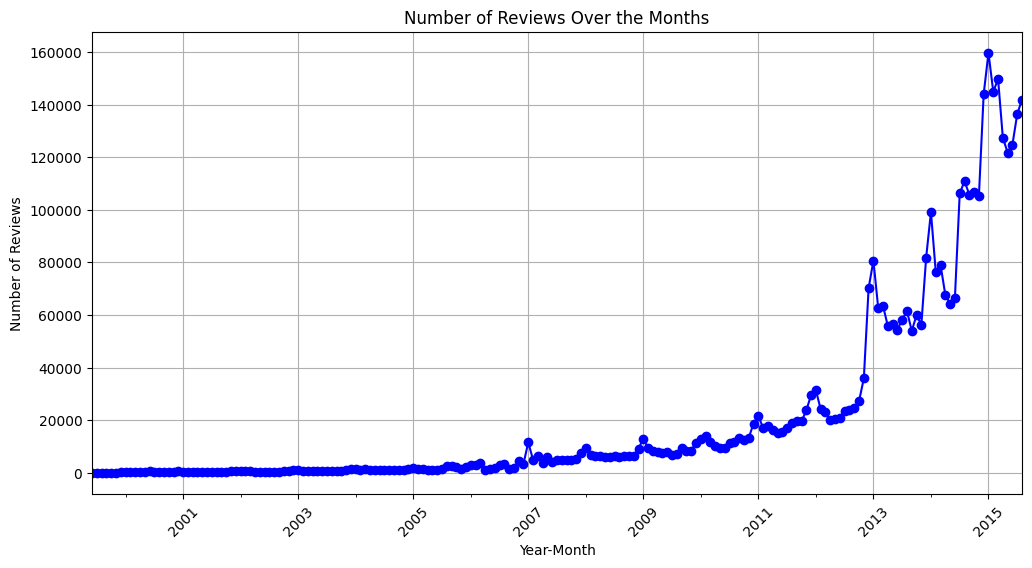

In [17]:
df_reviews['review_date'] = pd.to_datetime(df_reviews['review_date'], errors='coerce')
df_reviews['review_year'] = df_reviews['review_date'].dt.year
reviews_per_year = df_reviews.groupby('review_year').size()

plt.figure(figsize=(10, 6))
reviews_per_year.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Number of Reviews Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

df_reviews['year_month'] = df_reviews['review_date'].dt.to_period('M')
reviews_per_month = df_reviews.groupby('year_month').size()

plt.figure(figsize=(12, 6))
reviews_per_month.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Number of Reviews Over the Months')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<ipython-input-18-aa52f7c0807b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_verified_purchases['review_year'] = df_verified_purchases['review_date'].dt.year


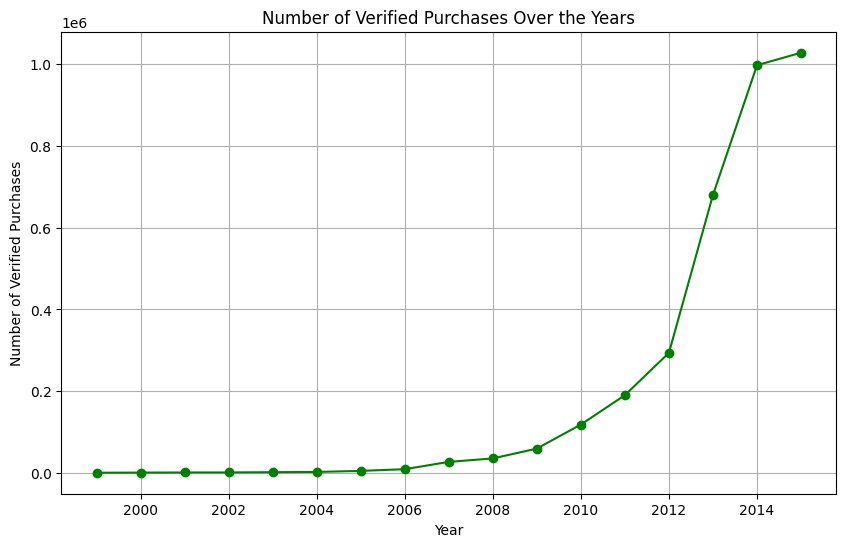

<ipython-input-18-aa52f7c0807b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_verified_purchases['year_month'] = df_verified_purchases['review_date'].dt.to_period('M')


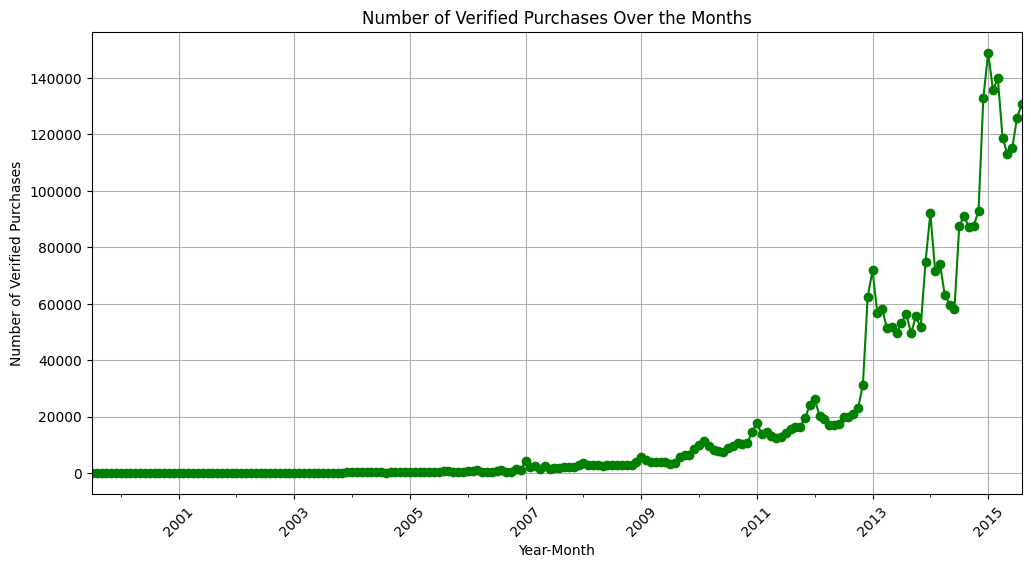

In [18]:
df_verified_purchases = df_reviews[df_reviews['verified_purchase'] == 'Y']
df_verified_purchases['review_year'] = df_verified_purchases['review_date'].dt.year
purchases_per_year = df_verified_purchases.groupby('review_year').size()

plt.figure(figsize=(10, 6))
purchases_per_year.plot(kind='line', marker='o', linestyle='-', color='g')
plt.title('Number of Verified Purchases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Verified Purchases')
plt.grid(True)
plt.show()

df_verified_purchases['year_month'] = df_verified_purchases['review_date'].dt.to_period('M')
purchases_per_month = df_verified_purchases.groupby('year_month').size()

plt.figure(figsize=(12, 6))
purchases_per_month.plot(kind='line', marker='o', linestyle='-', color='g')
plt.title('Number of Verified Purchases Over the Months')
plt.xlabel('Year-Month')
plt.ylabel('Number of Verified Purchases')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [19]:
df_reviews['review_date'] = pd.to_datetime(df_reviews['review_date'])
df_reviews['year_month'] = df_reviews['review_date'].dt.to_period('M')

# user review frequency for each month
user_reviews_frequency = df_reviews.groupby(['customer_id', 'year_month']).size().reset_index(name='monthly_reviews')
user_reviews_frequency_pivot = user_reviews_frequency.pivot(index='customer_id', columns='year_month', values='monthly_reviews')
user_reviews_frequency_pivot = user_reviews_frequency_pivot.fillna(0)
user_reviews_frequency_pivot['monthly_reviews_frequency'] = user_reviews_frequency_pivot.mean(axis=1)
print("User reviews frequency (each month as columns, with avg):")
print(user_reviews_frequency_pivot)

# frequency of product being reviews for each month
product_reviews_frequency = df_reviews.groupby(['product_id', 'year_month']).size().reset_index(name='monthly_reviews_per_product')
product_reviews_frequency_pivot = product_reviews_frequency.pivot(index='product_id', columns='year_month', values='monthly_reviews_per_product')
product_reviews_frequency_pivot = product_reviews_frequency_pivot.fillna(0)
product_reviews_frequency_pivot['monthly_reviews_frequency'] = product_reviews_frequency_pivot.mean(axis=1)
print("\nProduct reviews frequency (each month as columns, with avg):")
print(product_reviews_frequency_pivot)

User reviews frequency (each month as columns, with avg):
year_month   1999-06  1999-07  1999-08  1999-09  1999-10  1999-11  1999-12  \
customer_id                                                                  
10005            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
10036            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
10046            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
10048            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
10097            0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...              ...      ...      ...      ...      ...      ...      ...   
53096566         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
53096567         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
53096570         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
53096576         0.0      0.0      0.0      0.0      0.0      0.0      1.0   
530965

In [20]:
df_reviews = df_reviews.merge(
    user_reviews_frequency_pivot[['monthly_reviews_frequency']],
    left_on='customer_id',
    right_index=True,
    how='left'
)

In [21]:
user_reviews_counts = df_reviews['customer_id'].value_counts().rename('reviews_last_1_year')
df_reviews['reviews_last_1_year'] = df_reviews['customer_id'].map(user_reviews_counts)
print(df_reviews.head())

  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     24509695  R3VR960AHLFKDV  B004HB5E0E       488241329   
1          US     34731776  R16LGVMFKIUT0G  B0042TNMMS       205864445   
2          US      1272331  R1AIMEEPYHMOE4  B0030MPBZ4       124663823   
3          US     45284262  R1892CCSZWZ9SR  B005G02ESA       382367578   
4          US     30003523  R285P679YWVKD1  B005JS8AUA       309497463   

                                       product_title product_category  \
0                          Shoal Creek Computer Desk        Furniture   
1  Dorel Home Products Delaney Large Rectangular ...        Furniture   
2  Bathroom Vanity Table Jewelry Makeup Desk Benc...        Furniture   
3  Sleep Master Ultima Comfort Memory Foam 6 Inch...        Furniture   
4  1 1/4" GashGuards: Deluxe Rubberized Plastic B...        Furniture   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            4              0            0    N

Maximum number of reviews made by one user: 245


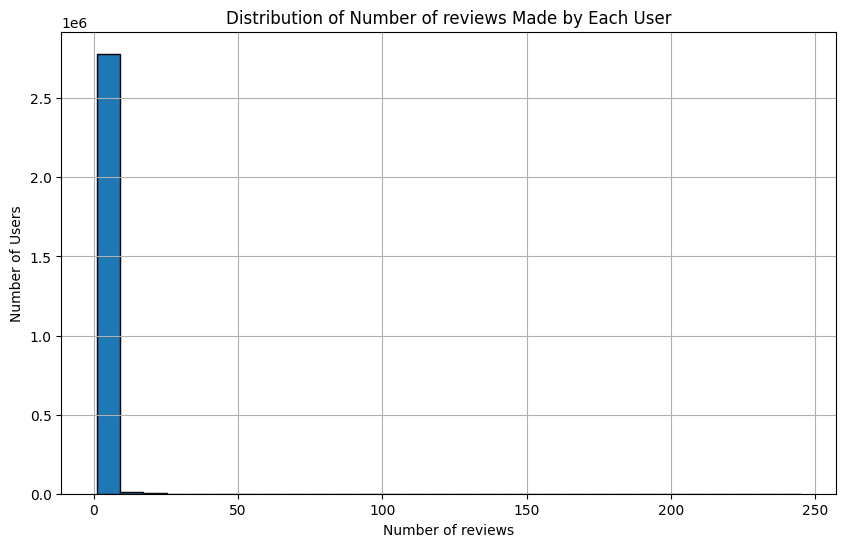

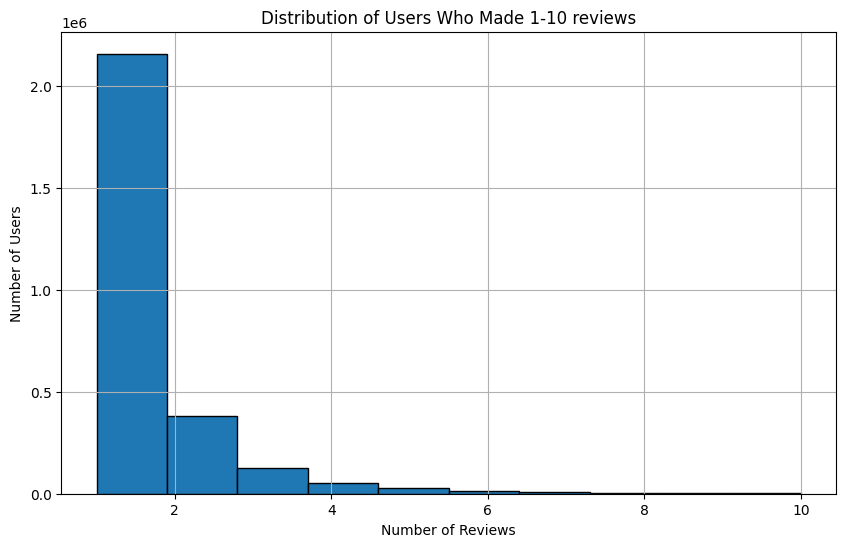

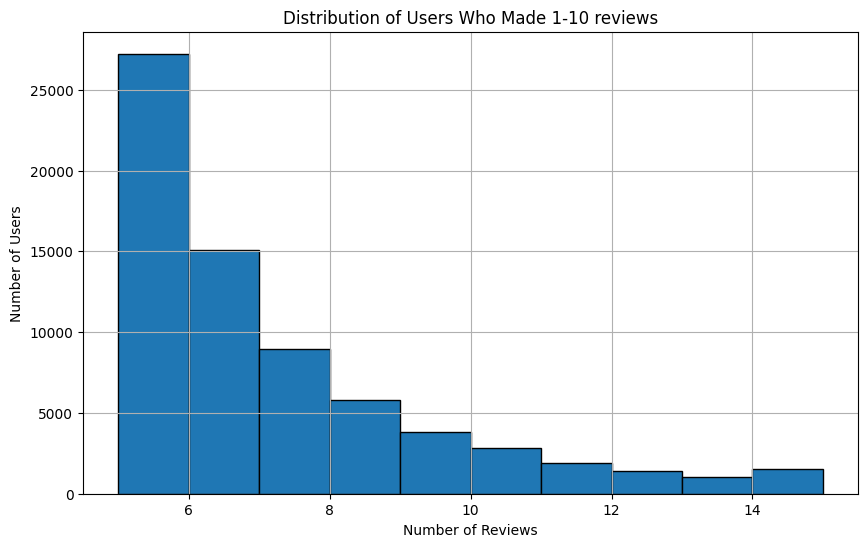

In [22]:
# Plot the distribution of number of reviews made by each user
user_total_reviews = user_reviews_frequency.groupby('customer_id')['monthly_reviews'].sum()
max_reviews = user_total_reviews.max()
print(f"Maximum number of reviews made by one user: {max_reviews}")

plt.figure(figsize=(10, 6))
plt.hist(user_total_reviews, bins=30, edgecolor='black')
plt.title('Distribution of Number of reviews Made by Each User')
plt.xlabel('Number of reviews')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

# Filter users who made between 1 and 10 reviews
filtered_reviews = user_total_reviews[(user_total_reviews >= 1) & (user_total_reviews <= 10)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_reviews, bins=10, edgecolor='black')
plt.title('Distribution of Users Who Made 1-10 reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

# Filter users who made between 5 and 15 reviews
filtered_reviews = user_total_reviews[(user_total_reviews >= 5) & (user_total_reviews <= 15)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_reviews, bins=10, edgecolor='black')
plt.title('Distribution of Users Who Made 1-10 reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

Maximum number of purchases made by one user: 112


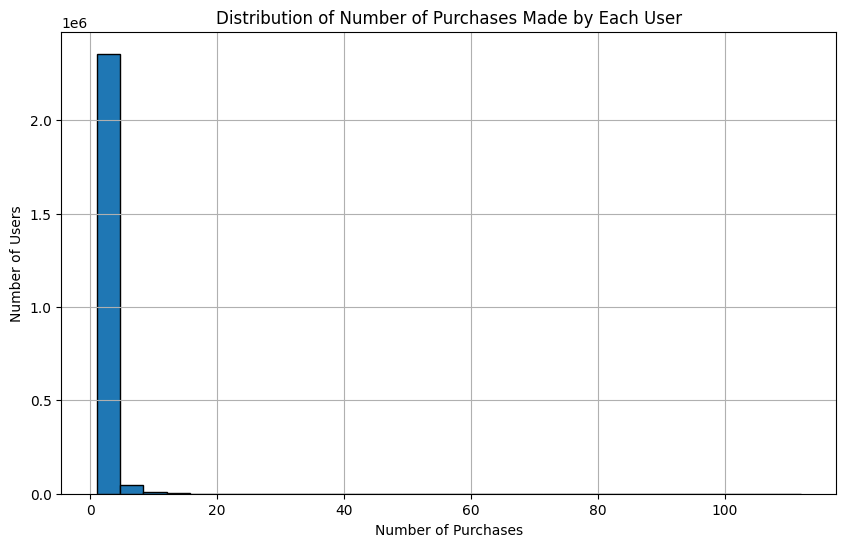

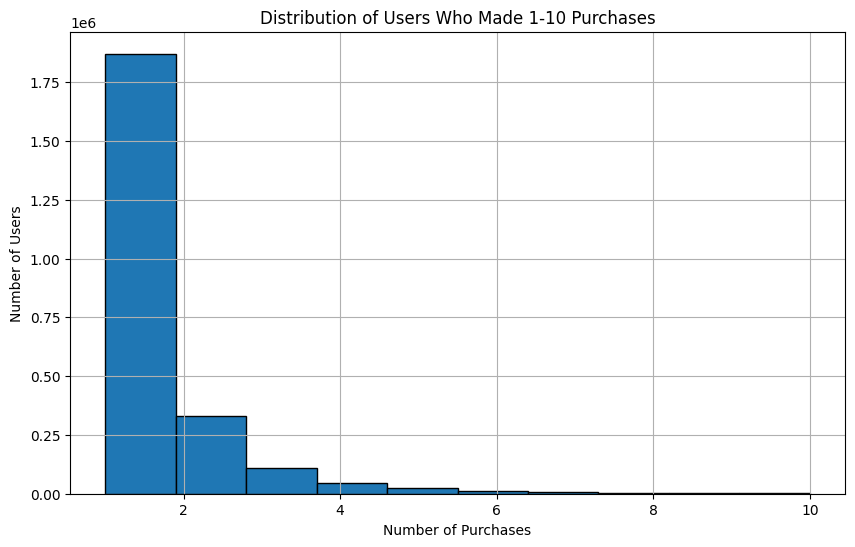

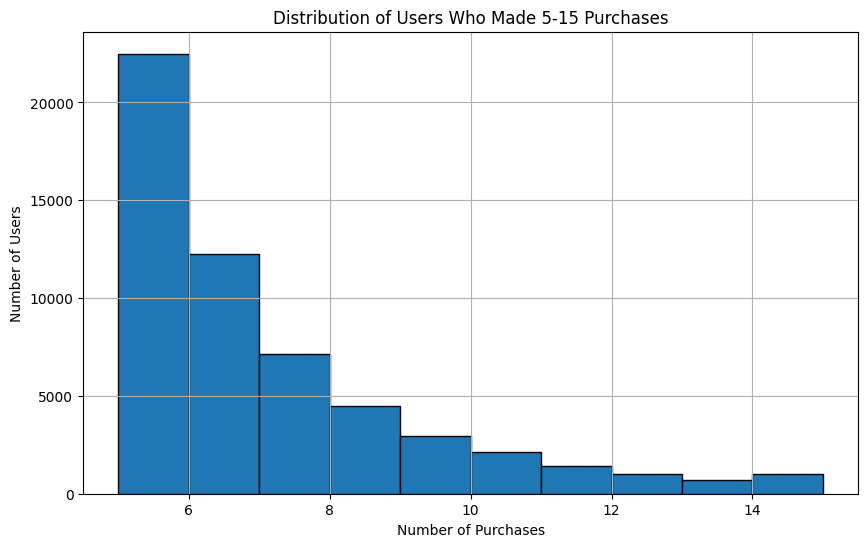

In [23]:
# Filter the dataset for verified purchases
df_verified_purchases = df_reviews[df_reviews['verified_purchase'] == 'Y']

user_total_purchases = df_verified_purchases.groupby('customer_id').size()
max_purchases = user_total_purchases.max()
print(f"Maximum number of purchases made by one user: {max_purchases}")

# Plot the distribution of the total number of purchases made by each user
plt.figure(figsize=(10, 6))
plt.hist(user_total_purchases, bins=30, edgecolor='black')
plt.title('Distribution of Number of Purchases Made by Each User')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

# Filter users who made between 1 and 10 purchases
filtered_purchases_1_10 = user_total_purchases[(user_total_purchases >= 1) & (user_total_purchases <= 10)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_purchases_1_10, bins=10, edgecolor='black')
plt.title('Distribution of Users Who Made 1-10 Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

# Filter users who made between 5 and 15 purchases
filtered_purchases_5_15 = user_total_purchases[(user_total_purchases >= 5) & (user_total_purchases <= 15)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_purchases_5_15, bins=10, edgecolor='black')
plt.title('Distribution of Users Who Made 5-15 Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()


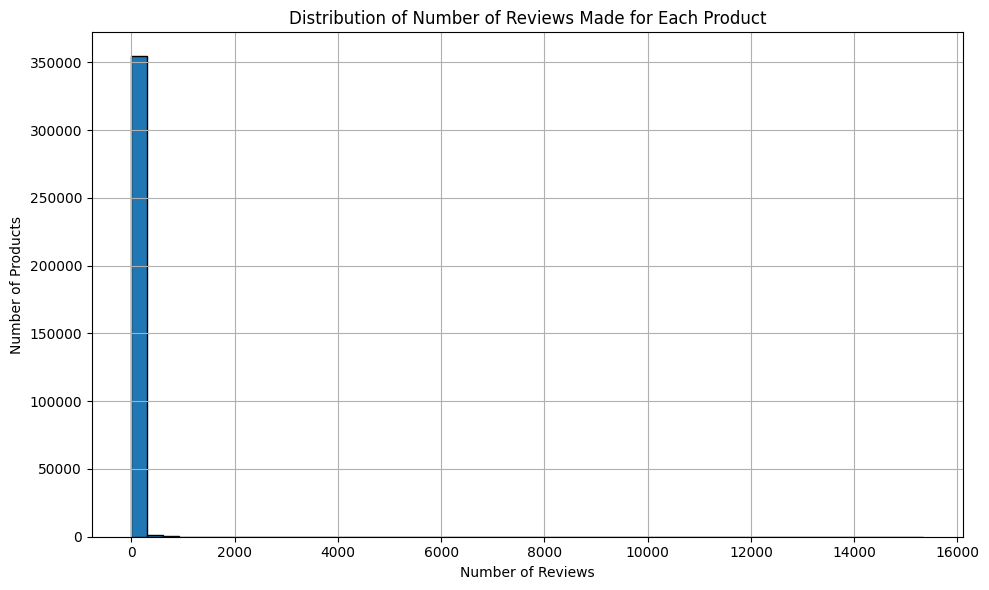

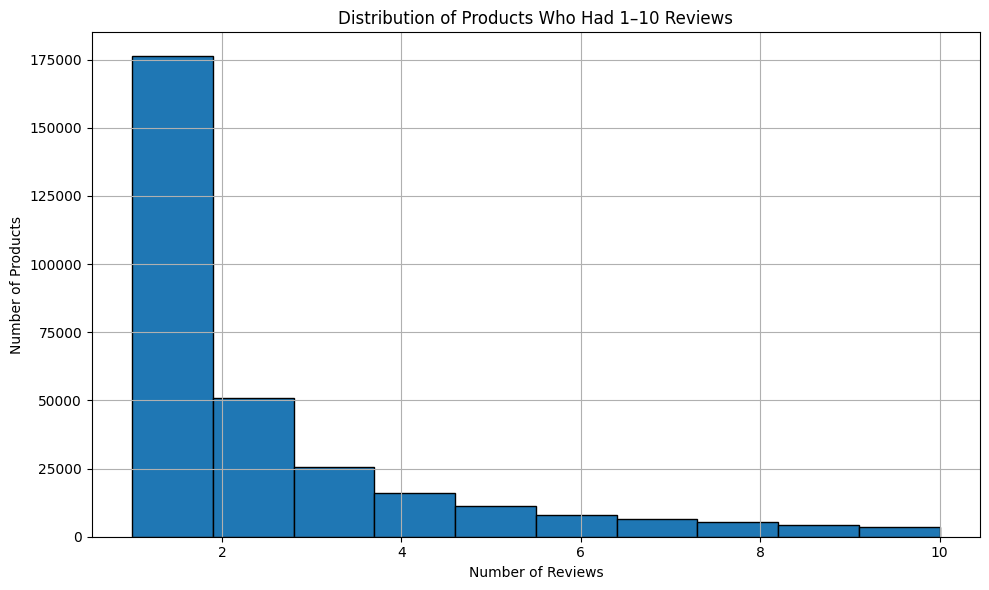

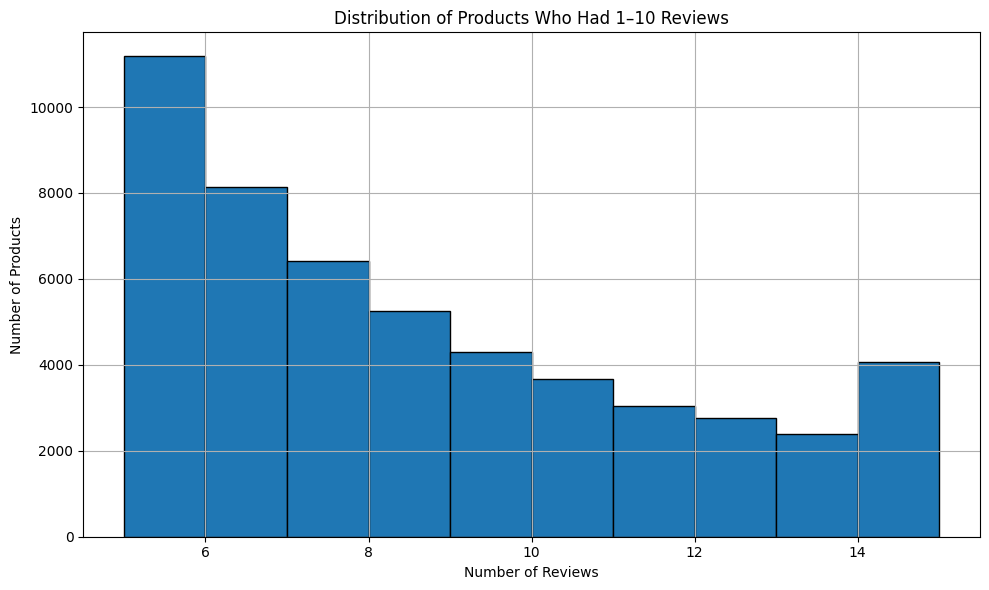

In [24]:
product_reviews_counts = df_reviews['product_id'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(product_reviews_counts, bins=50, edgecolor='black')
plt.title('Distribution of Number of Reviews Made for Each Product')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Products')
plt.grid(True)
plt.tight_layout()
plt.show()

# Filter products that had between 1 and 10 Reviews
filtered_counts = product_reviews_counts[product_reviews_counts.between(1, 10)]
plt.figure(figsize=(10, 6))
plt.hist(filtered_counts, bins=10, edgecolor='black')
plt.title('Distribution of Products Who Had 1–10 Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Products')
plt.grid(True)
plt.tight_layout()
plt.show()

# Filter products that had between 5 and 15 Reviews
filtered_counts = product_reviews_counts[product_reviews_counts.between(5, 15)]
plt.figure(figsize=(10, 6))
plt.hist(filtered_counts, bins=10, edgecolor='black')
plt.title('Distribution of Products Who Had 1–10 Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Products')
plt.grid(True)
plt.tight_layout()
plt.show()

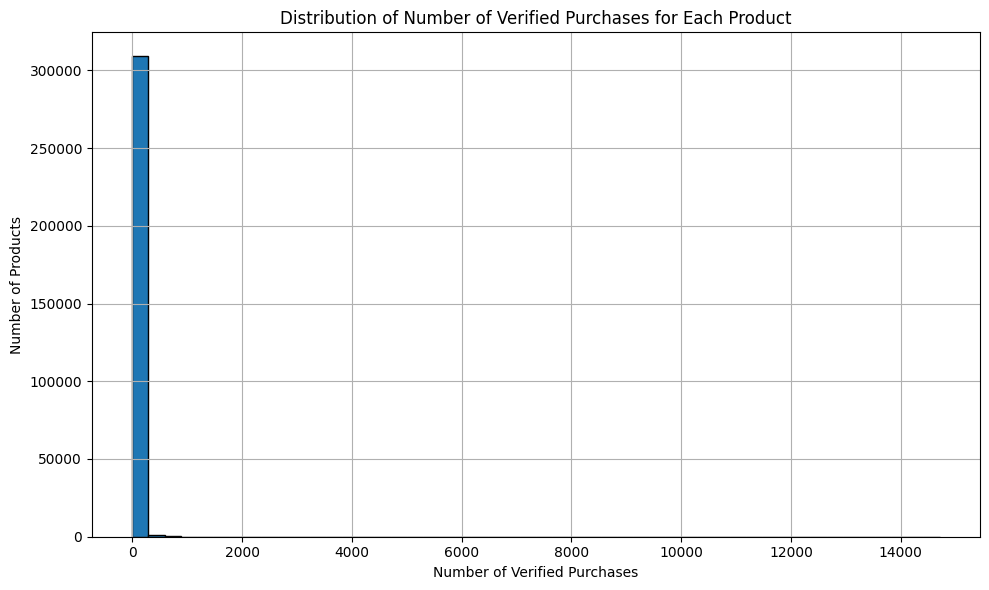

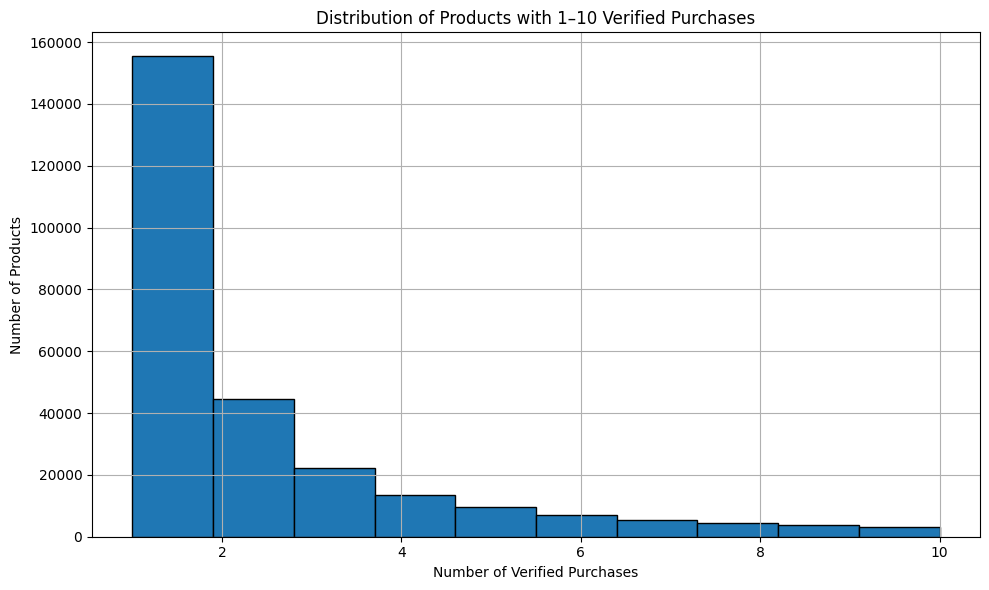

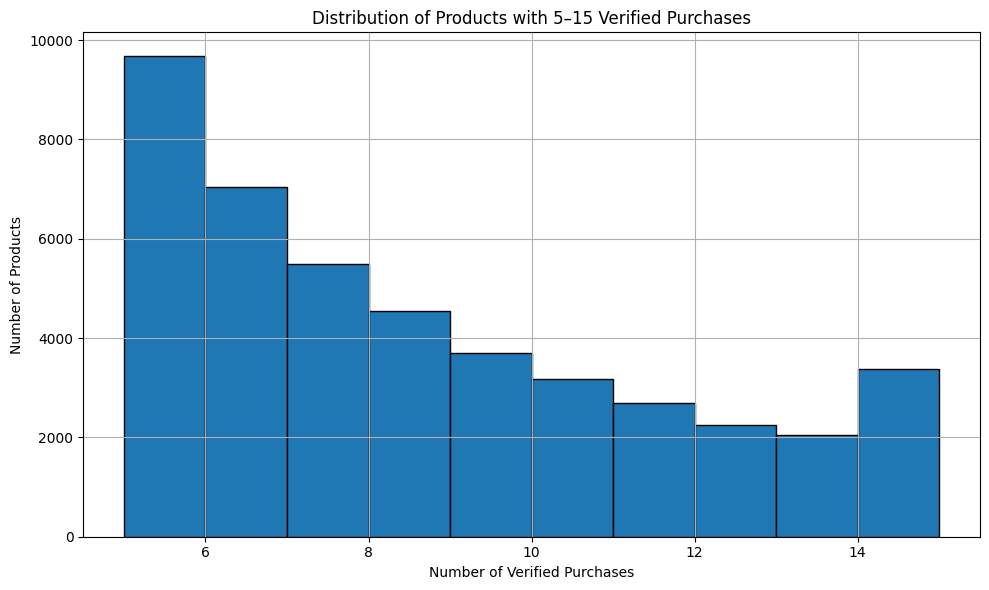

In [25]:
product_purchases_counts = df_verified_purchases['product_id'].value_counts()

# Plot the distribution of the number of verified purchases made for each product
plt.figure(figsize=(10, 6))
plt.hist(product_purchases_counts, bins=50, edgecolor='black')
plt.title('Distribution of Number of Verified Purchases for Each Product')
plt.xlabel('Number of Verified Purchases')
plt.ylabel('Number of Products')
plt.grid(True)
plt.tight_layout()
plt.show()

# Filter products that had between 1 and 10 Verified Purchases
filtered_counts_1_10 = product_purchases_counts[product_purchases_counts.between(1, 10)]
plt.figure(figsize=(10, 6))
plt.hist(filtered_counts_1_10, bins=10, edgecolor='black')
plt.title('Distribution of Products with 1–10 Verified Purchases')
plt.xlabel('Number of Verified Purchases')
plt.ylabel('Number of Products')
plt.grid(True)
plt.tight_layout()
plt.show()

# Filter products that had between 5 and 15 Verified Purchases
filtered_counts_5_15 = product_purchases_counts[product_purchases_counts.between(5, 15)]
plt.figure(figsize=(10, 6))
plt.hist(filtered_counts_5_15, bins=10, edgecolor='black')
plt.title('Distribution of Products with 5–15 Verified Purchases')
plt.xlabel('Number of Verified Purchases')
plt.ylabel('Number of Products')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
users_more_than_5_reviews = user_total_reviews[user_total_reviews >= 5].count()

products_more_than_5_reviews = product_reviews_counts[product_reviews_counts >= 5].count()

# Print the results
print(f"Number of users who made at least 5 reviews: {users_more_than_5_reviews}")
print(f"Number of products with at least 5 reviews: {products_more_than_5_reviews}")

Number of users who made at least 5 reviews: 72846
Number of products with at least 5 reviews: 87706


In [26]:
df_verified_purchases = df_reviews[df_reviews['verified_purchase'] == 'Y']

# Count the total number of verified purchases made by each user
user_total_purchases = df_verified_purchases.groupby('customer_id').size()
users_more_than_5_purchases = user_total_purchases[user_total_purchases >= 5].count()

# Count the number of verified purchases for each product
product_purchases_counts = df_verified_purchases['product_id'].value_counts()
products_more_than_5_purchases = product_purchases_counts[product_purchases_counts >= 5].count()

print(f"Number of users who made at least 5 verified purchases: {users_more_than_5_purchases}")
print(f"Number of products with at least 5 verified purchases: {products_more_than_5_purchases}")

Number of users who made at least 5 verified purchases: 57337
Number of products with at least 5 verified purchases: 74850


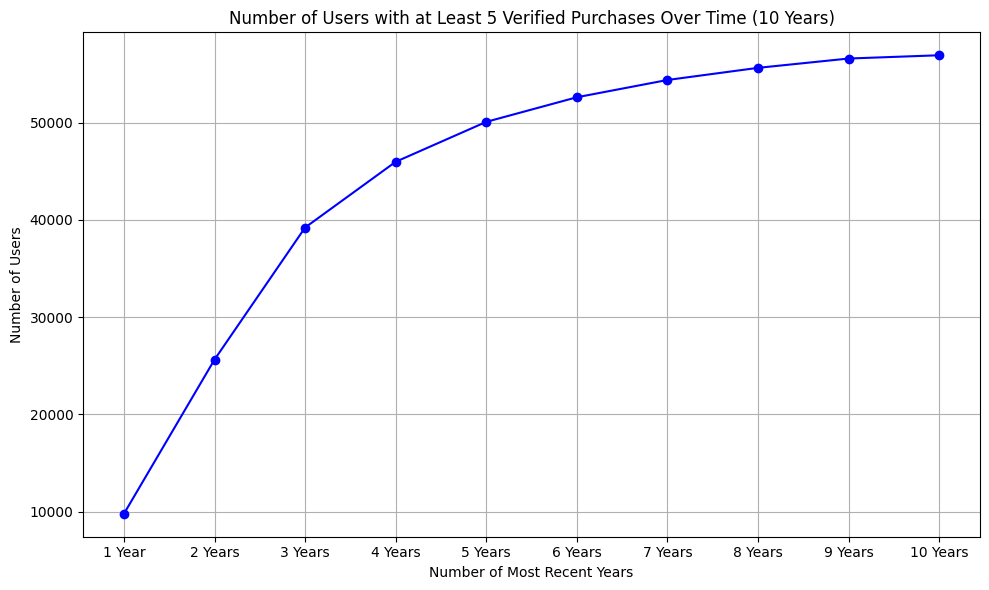

Number of users with at least 5 verified purchases in most recent 1 year(s): 9771
Number of users with at least 5 verified purchases in most recent 2 year(s): 25632
Number of users with at least 5 verified purchases in most recent 3 year(s): 39219
Number of users with at least 5 verified purchases in most recent 4 year(s): 45983
Number of users with at least 5 verified purchases in most recent 5 year(s): 50091
Number of users with at least 5 verified purchases in most recent 6 year(s): 52621
Number of users with at least 5 verified purchases in most recent 7 year(s): 54399
Number of users with at least 5 verified purchases in most recent 8 year(s): 55648
Number of users with at least 5 verified purchases in most recent 9 year(s): 56606
Number of users with at least 5 verified purchases in most recent 10 year(s): 56942


In [30]:
df_verified_purchases = df_reviews[df_reviews['verified_purchase'] == 'Y']
# Get the current year
current_year = df_verified_purchases['review_year'].max()

# Function to count users with at least 5 purchases for a given time period
def count_users_with_5_purchases_in_period(years_back):
    start_year = current_year - years_back + 1
    period_data = df_verified_purchases[df_verified_purchases['review_year'] >= start_year]

    # Count the total number of purchases made by each user
    user_total_purchases = period_data.groupby('customer_id').size()

    # Count the number of users who made at least 5 verified purchases
    users_more_than_5_purchases = user_total_purchases[user_total_purchases >= 5].count()

    return users_more_than_5_purchases

# List to store the number of users for each time period
users_count_per_period = []

# Calculate the number of users for the most recent 1 to 10 years
for years_back in range(1, 11):  # Most recent 1 to 10 years
    users_count_per_period.append(count_users_with_5_purchases_in_period(years_back))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), users_count_per_period, marker='o', linestyle='-', color='b')
plt.title('Number of Users with at Least 5 Verified Purchases Over Time (10 Years)')
plt.xlabel('Number of Most Recent Years')
plt.ylabel('Number of Users')
plt.xticks(range(1, 11), [f'{i} Year{"s" if i > 1 else ""}' for i in range(1, 11)])
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the results for each year
for years_back, count in zip(range(1, 11), users_count_per_period):
    print(f"Number of users with at least 5 verified purchases in most recent {years_back} year(s): {count}")


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = ''.join([char for char in text if char not in string.punctuation])
        stop_words = set(stopwords.words('english'))
        text = ' '.join([word for word in text.split() if word not in stop_words])
        return text
    return ''  # Return an empty string if the text is NaN or not a string

df_reviews['cleaned_review_body'] = df_reviews['review_body'].apply(preprocess_text)

text_for_wordcloud = ' '.join(df_reviews['cleaned_review_body'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Bodies')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
data_dir = '/content/drive/MyDrive/bt4222_group_6/bt4222_group_6_amazon/data'
project_dir = '/content/drive/MyDrive/bt4222_group_6/bt4222_group_6_amazon'
df_reviews = pd.read_csv(os.path.join(data_dir,"filtered_reviews_with_features_and_clusters.csv"))

In [10]:
user2idx = {user_id: idx for idx, user_id in enumerate(df_reviews['customer_id'].unique())}
item2idx = {item_id: idx for idx, item_id in enumerate(df_reviews['product_id'].unique())}

df_reviews['user_idx'] = df_reviews['customer_id'].map(user2idx)
df_reviews['item_idx'] = df_reviews['product_id'].map(item2idx)

num_items = df_reviews['item_idx'].max() + 1

def split_data_for_lstm(df_reviews, min_seq_length=7, max_len=10):
    train_data = []
    test_data = []

    # Sort reviews by user and review date
    df_sorted = df_reviews.sort_values(by=['user_idx', 'review_date'])

    for user_id, group in df_sorted.groupby('user_idx'):
        group = group.sort_values('review_date')
        products = list(group['item_idx'].values)

        # Only consider users with enough interactions
        if len(products) >= min_seq_length:
            # --- Training example ---
            # Use first 4 products as sequence
            seq_train = products[:4]
            # Positive example: actual next product purchased
            pos_candidate = products[4]
            train_data.append((seq_train, pos_candidate, 1))
            # Negative example: sample a candidate that was not purchased by this user.
            # Note: Ensure negative candidate is not in the user’s history.
            neg_candidate = np.random.choice(np.arange(num_items))
            while neg_candidate in products:
                neg_candidate = np.random.choice(np.arange(num_items))
            train_data.append((seq_train, neg_candidate, 0))

            # --- Testing examples ---
            for i in range(5, len(products)):
                seq_test = products[i-4:i]
                pos_candidate = products[i]
                test_data.append((seq_test, pos_candidate, 1))
                # Create a negative sample for testing as well.
                neg_candidate = np.random.choice(np.arange(num_items))
                while neg_candidate in products:
                    neg_candidate = np.random.choice(np.arange(num_items))
                test_data.append((seq_test, neg_candidate, 0))

    return train_data, test_data

# Split the data
train_data, test_data = split_data_for_lstm(df_reviews)

print(f"Training Data Size: {len(train_data)}")
print(f"Testing Data Size: {len(test_data)}")

Training Data Size: 36968
Testing Data Size: 177106
